In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.stattools import q_stat
from statsmodels.tsa.stattools import acf
import warnings
warnings.simplefilter('ignore')
from arch import arch_model

%matplotlib inline

### To run this code, please make sure the 40 stocks files are stored in the a sub directory named "stock".

In [2]:
def getForecast_GARCH(N):
    stock='stock/stock'+str(N)+'.txt'
    data = np.genfromtxt(fname=stock,delimiter=",",skip_header=True,dtype=np.float,usecols=(1))
    df_data=pd.DataFrame(data=data,columns=['Price'])
    am = arch_model(df_data*100, p=1, o=1, q=1,vol='GARCH')
    res = am.fit(update_freq=5, disp='off')
    return res

In [16]:
def getQuantile15_GARCH_simulation(N):
    res=getForecast_GARCH(N)
    forecasts = res.forecast(horizon=10, method='bootstrap',simulations=10000)
    quantile15=np.quantile(forecasts.simulations.values[-1],q=0.15,axis=0)/100
    return np.array(quantile15)

In [4]:
def getQuantile15_GARCH_theoretical(N):
    res=getForecast_GARCH(N)
    forecasts = res.forecast(horizon=10, method='simulation',simulations=10000)
    s=np.sqrt(forecasts.variance.values[-1]/10000)
    quantile15=-1.03643*s
    return np.array(quantile15)

In [5]:
def getForecast(N):
    stock='stock/stock'+str(N)+'.txt'
    data = np.genfromtxt(fname=stock,delimiter=",",skip_header=True,dtype=np.float,usecols=(1))
    df_data=pd.DataFrame(data=data,columns=['Price'])
    am = arch_model(df_data*100, p=1, o=1, q=1,vol='EGARCH', dist='StudentsT')
    res = am.fit(update_freq=5, disp='off')
    return res

In [6]:
def getQuantile15(N):
    res=getForecast(N)
    forecasts = res.forecast(horizon=10, method='simulation',simulations=10000)
    quantile15=np.quantile(forecasts.simulations.values[-1],q=0.15,axis=0)/100
    return np.array(quantile15)

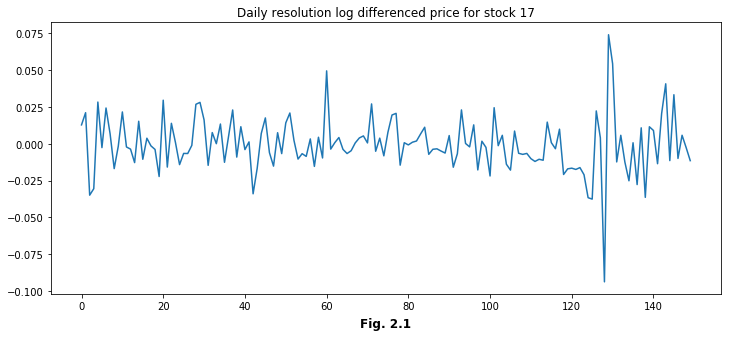

In [7]:
N=17
stock='stock/stock'+str(N)+'.txt'
data = np.genfromtxt(fname=stock,delimiter=",",skip_header=True,dtype=np.float,usecols=(1))
df_data=pd.DataFrame(data=data,columns=['Price'])
fig=plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.set_title(str('Daily resolution log differenced price for stock '+str(N)))
ax.text(0.5,-0.12, "Fig. 2.1", size=12, ha="center", transform=ax.transAxes,weight='bold')
plt.plot(data)

#### Engle's LM test: 

In [8]:
print("p value is {:5.6f}".format(het_arch(data)[1]))

p value is 0.003577


The p-value is less than 1% hence the null hypothesis can be rejected at 1% significance level,
meaning that the ARCH affects are quite significant in the daily log returns.

#### ACF

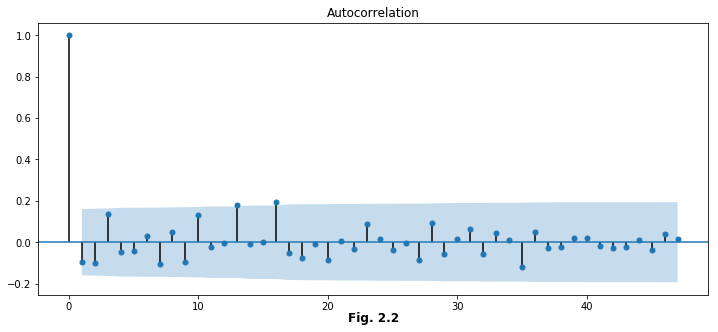

In [9]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
ax.text(0.5,-0.1, "Fig. 2.2", size=12, ha="center", transform=ax.transAxes,weight='bold')
plot_acf(data,lags=np.arange(0,48),ax=ax);

In [41]:
res=getForecast_GARCH(20)
forecasts = res.forecast(horizon=10, method='bootstrap',simulations=10000)

In [42]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  Price   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -224.652
Distribution:                  Normal   AIC:                           459.304
Method:            Maximum Likelihood   BIC:                           474.357
                                        No. Observations:                  150
Date:                Mon, Apr 22 2019   Df Residuals:                      145
Time:                        14:56:26   Df Model:                            5
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1058  9.562e-02      1.107      0.269 [-8.161e-02,  0.293]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.5142      0.160      3.212  1.319e-03   [  0.200,  0.828]
alpha[1]   8.2717e-12  5.427e-02  1.524e-10      1.000   [ -0.106,  0.106]
gamma[1]       0.3308      0.515      0.642      0.521   [ -0.679,  1.341]
beta[1]        0.4403      0.179      2.456  1.405e-02 [8.893e-02,  0.792]
==========================================================================

Covariance estimator: robust
"""

#### The forecast result using GARCH Model.

1. By simulation(Bootstrap)

In [17]:
result_data_garch_simulation=[]
for i in np.arange(1,41):
    a=getQuantile15_GARCH_simulation(i)
    result_data_garch_simulation.append(a)

2. Theoretical

In [18]:
result_data_garch_theoretical=[]
for i in np.arange(1,41):
    a=getQuantile15_GARCH_theoretical(i)
    result_data_garch_theoretical.append(a)

In [48]:
result_data_garch_simulation[20]

array([-0.02105246, -0.01891902, -0.01958589, -0.01846559, -0.01768079,
       -0.01676607, -0.01701528, -0.01646648, -0.01638114, -0.01646933])

In [49]:
result_data_garch_theoretical[20]

array([-0.02181549, -0.02068851, -0.01970846, -0.01899656, -0.01841072,
       -0.01796263, -0.01760929, -0.01737189, -0.01716597, -0.01697496])

#### The forecast result using EGARCH Model.

In [25]:
result_data=[]
for i in np.arange(1,41):
    a=getQuantile15(i)
    result_data.append(a)

C:\Users\Jackie Li\Anaconda3\lib\site-packages\arch\univariate\base.py:577: ConvergenceWarning: 
The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\Jackie Li\Anaconda3\lib\site-packages\arch\univariate\base.py:577: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\Jackie Li\Anaconda3\lib\site-packages\arch\univariate\base.py:577: ConvergenceWarning: 
The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\Jackie Li\Anaconda3\lib\site-packages\arch\univariate\base.py:577: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)
C:\Users\Jackie Li

In [28]:
result_data[10]

array([-0.01574469, -0.01516793, -0.01430382, -0.01433381, -0.01413956,
       -0.01380114, -0.01409021, -0.01405224, -0.01419223, -0.01415402])

prefer GARCH model

In [50]:
result_data=np.array(result_data).T
result_data_garch_simulation=np.array(result_data_garch_simulation).T
result_data_garch_theoretical=np.array(result_data_garch_theoretical).T

In [54]:
result_data.shape

(10, 40)

In [57]:
np.savetxt('comparison/GARCH_Theoretical.csv',result_data_garch_theoretical,delimiter=',')

In [51]:
forecasts.residual_variance.tail()/100

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,0.022734,0.018532,0.016057,0.014663,0.013827,0.01333,0.013108,0.012898,0.012889,0.012699


assume normal distribution, 15% lower quantile

In [52]:
s=np.sqrt(forecasts.variance.values[-1]/10000)
-1.03643*s

array([-0.01562717, -0.01410903, -0.01313339, -0.01255042, -0.012187  ,
       -0.01196625, -0.01186607, -0.01177044, -0.01176677, -0.01167961])

By simulation, 15% lower quantile

In [53]:
getQuantile15(20)

array([-0.01316212, -0.0119065 , -0.01132768, -0.01071698, -0.01022607,
       -0.01001358, -0.00941453, -0.00906662, -0.00917292, -0.00925284])